In [1]:
import findspark
findspark.init()

In [2]:
from pyspark import SparkContext
sc = SparkContext()
from pyspark.sql import SQLContext
sqlContext=SQLContext(sc)

In [3]:
bd5 = sqlContext.read.format(
    "csv"
).option("header", "true").load("bd5.csv", inferSchema=True)
sqlContext.registerDataFrameAsTable(bd5, "bd5")

In [4]:
pdf4 = bd5.sample(False, 0.1, 0).select('Dest','Horario','ArrDelay','DepDelay','RetrasoNeto').toPandas()
pdf4.corr()


,Horario,ArrDelay,DepDelay,RetrasoNeto
Horario,1.000000,0.114735,0.110887,0.039457
ArrDelay,0.114735,1.000000,0.961630,0.360340
DepDelay,0.110887,0.961630,1.000000,0.090596
RetrasoNeto,0.039457,0.360340,0.090596,1.000000


In [5]:
x1=pdf4['Horario']
x2=pdf4['ArrDelay']
x3=pdf4['DepDelay']
x4=pdf4['RetrasoNeto']

In [6]:
x1.shape

(3141,)

In [7]:
x1=x1.to_numpy()
x2=x2.to_numpy()
x3=x3.to_numpy()
x4=x4.to_numpy()


In [8]:
type(x1)

numpy.ndarray

In [9]:
x1=x1[:1000]
x2=x2[:1000]
x3=x3[:1000]
x4=x4[:1000]


In [10]:
data= sc.parallelize([x1,x2,x3,x4])

In [11]:
x1.shape

(1000,)

In [12]:
from pyspark.mllib.stat import Statistics
print(Statistics.corr(data, method="pearson"))

[[1.         0.9538293  0.22401433 ... 0.40129879 0.99058254 0.99348999]
 [0.9538293  1.         0.50529444 ... 0.65496098 0.90953449 0.92207829]
 [0.22401433 0.50529444 1.         ... 0.98100102 0.10184583 0.14636565]
 ...
 [0.40129879 0.65496098 0.98100102 ... 1.         0.28164289 0.33169768]
 [0.99058254 0.90953449 0.10184583 ... 0.28164289 1.         0.98881315]
 [0.99348999 0.92207829 0.14636565 ... 0.33169768 0.98881315 1.        ]]


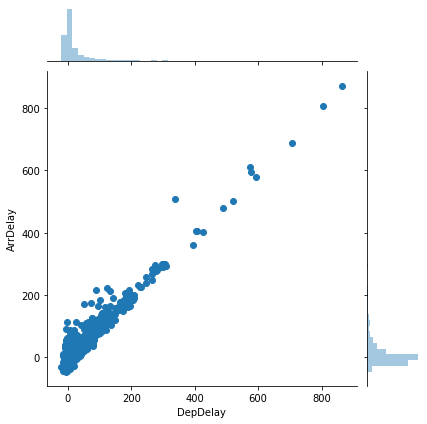

In [13]:
import seaborn as sns
%matplotlib inline
sns.jointplot(x="DepDelay", y="ArrDelay", data=pdf4)

In [14]:

from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

assembler = VectorAssembler(
    inputCols=['DepDelay'],
    outputCol='features')

bd6 = assembler.transform(bd5).select(col("ArrDelay").alias("label"),'features')
bd6.show()

+-----+--------+
|label|features|
+-----+--------+
| -7.0|  [-5.0]|
| -3.0|   [5.0]|
| -3.0|  [-3.0]|
| -2.0|  [-7.0]|
| -2.0|  [-6.0]|
|  0.0|  [-1.0]|
| -6.0|   [0.0]|
|  7.0|   [0.0]|
| -9.0|  [-1.0]|
| -2.0|  [-1.0]|
| 13.0|   [1.0]|
|-16.0|  [-2.0]|
|-21.0|  [-4.0]|
|-16.0|  [-1.0]|
|-11.0|   [0.0]|
| -8.0|   [0.0]|
| -4.0|  [13.0]|
|  0.0|  [17.0]|
| -2.0|  [12.0]|
|  2.0|  [19.0]|
+-----+--------+
only showing top 20 rows



In [15]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression()
model = lr.fit(bd6)
pred = model.transform(bd6)

In [16]:
print(model.intercept,model.coefficients)

-4.399441080491326 [1.0278600247757472]
